In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_g4bl import readFieldMapData
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)

In [2]:
# Inner radius:
a = 360

# Outer radius:
b = 500

## Single solenoid -- no rotations

### Plot transverse slice at z=0

In [3]:
file = 'fieldmap.txt'

data = readFieldMapData(file)

/Users/criggall/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


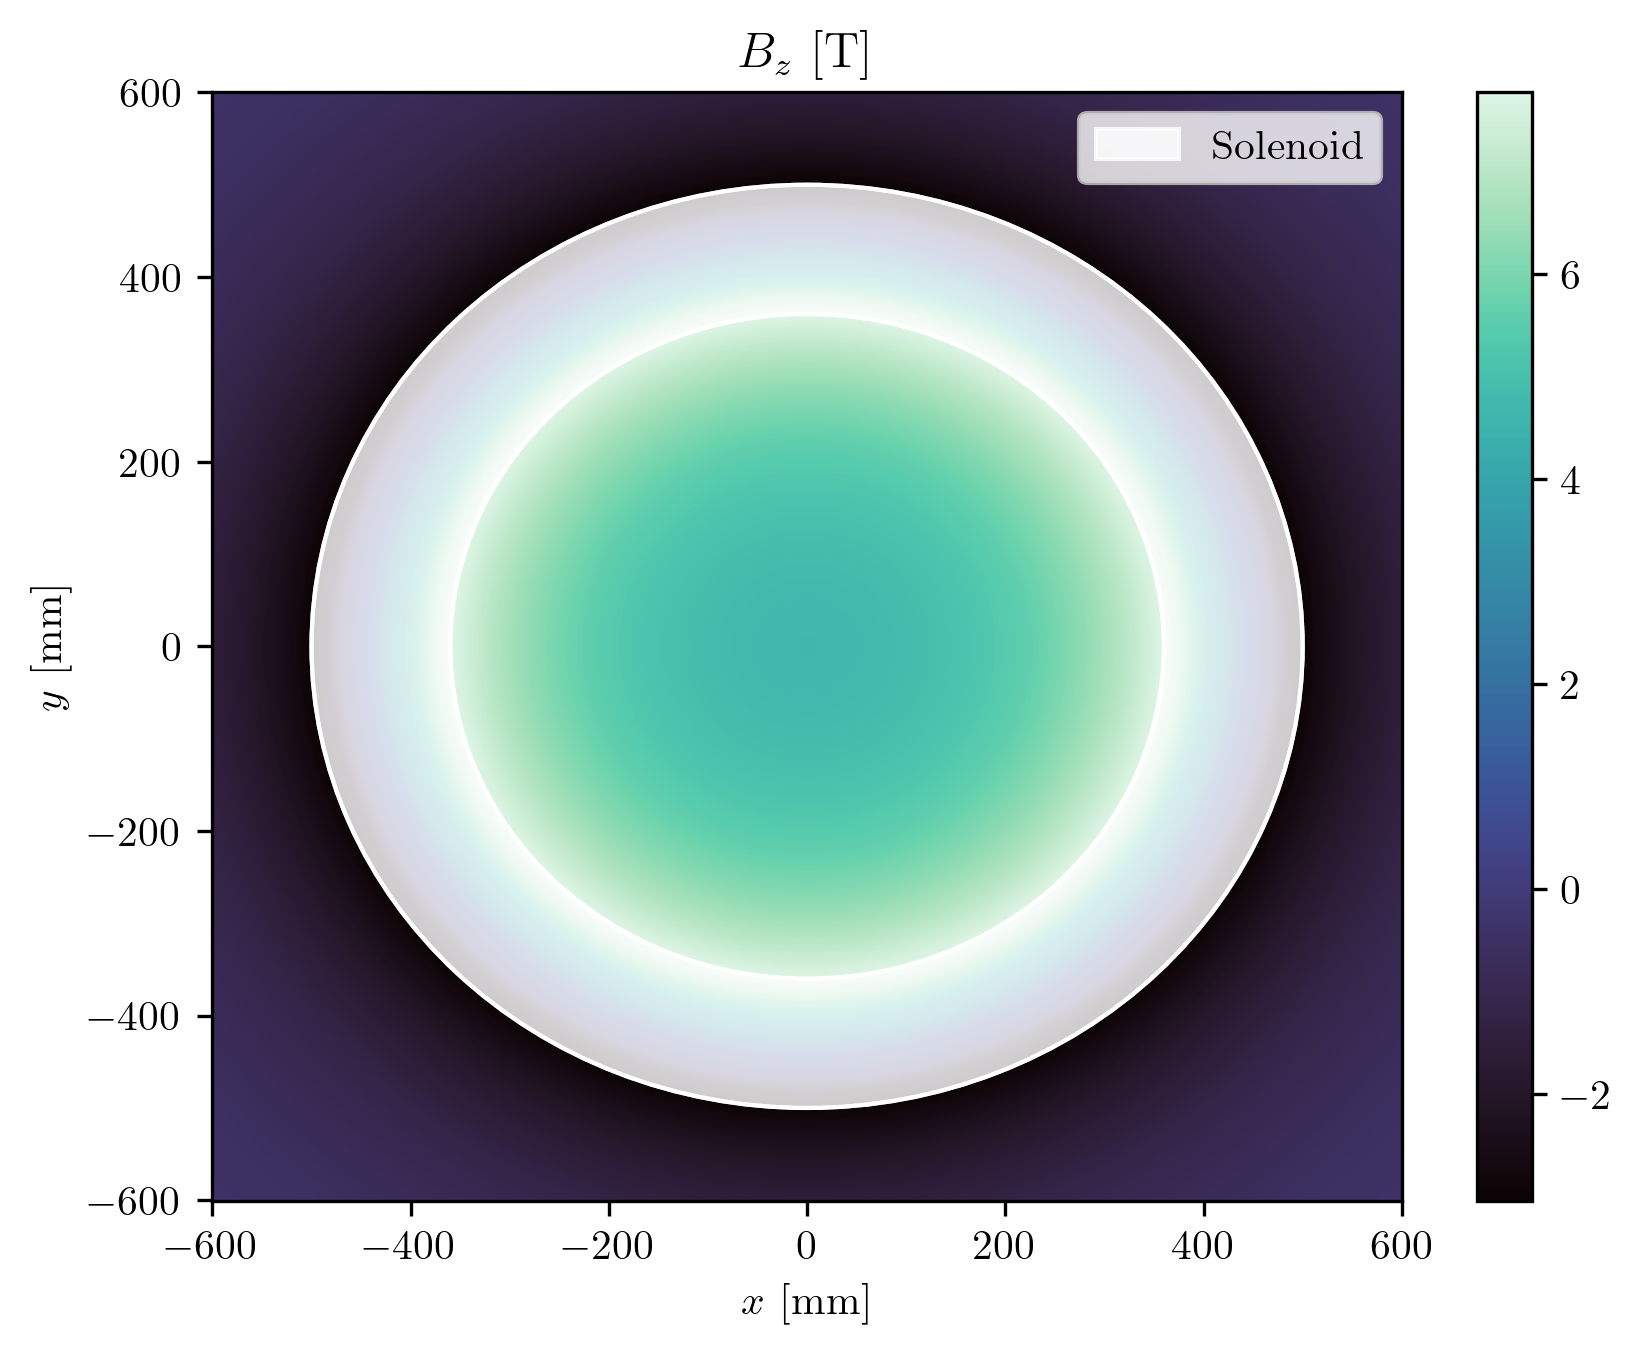

In [4]:
data_filtered = data[data['z'] == 0.0]

x_unique = np.sort(data_filtered['x'].unique())
y_unique = np.sort(data_filtered['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

B_pivot = data_filtered.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean')
B_grid = B_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, B_grid, cmap=cmap, shading='auto')

circle_inner = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='white')
ax.add_patch(circle_inner)

circle_outer = plt.Circle([0,0], radius=b, fill=False, linestyle='-', color='white')
ax.add_patch(circle_outer)

fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8)
ax.add_patch(fill)
plt.legend()

plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.colorbar(pcm)
plt.show()

/Users/criggall/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


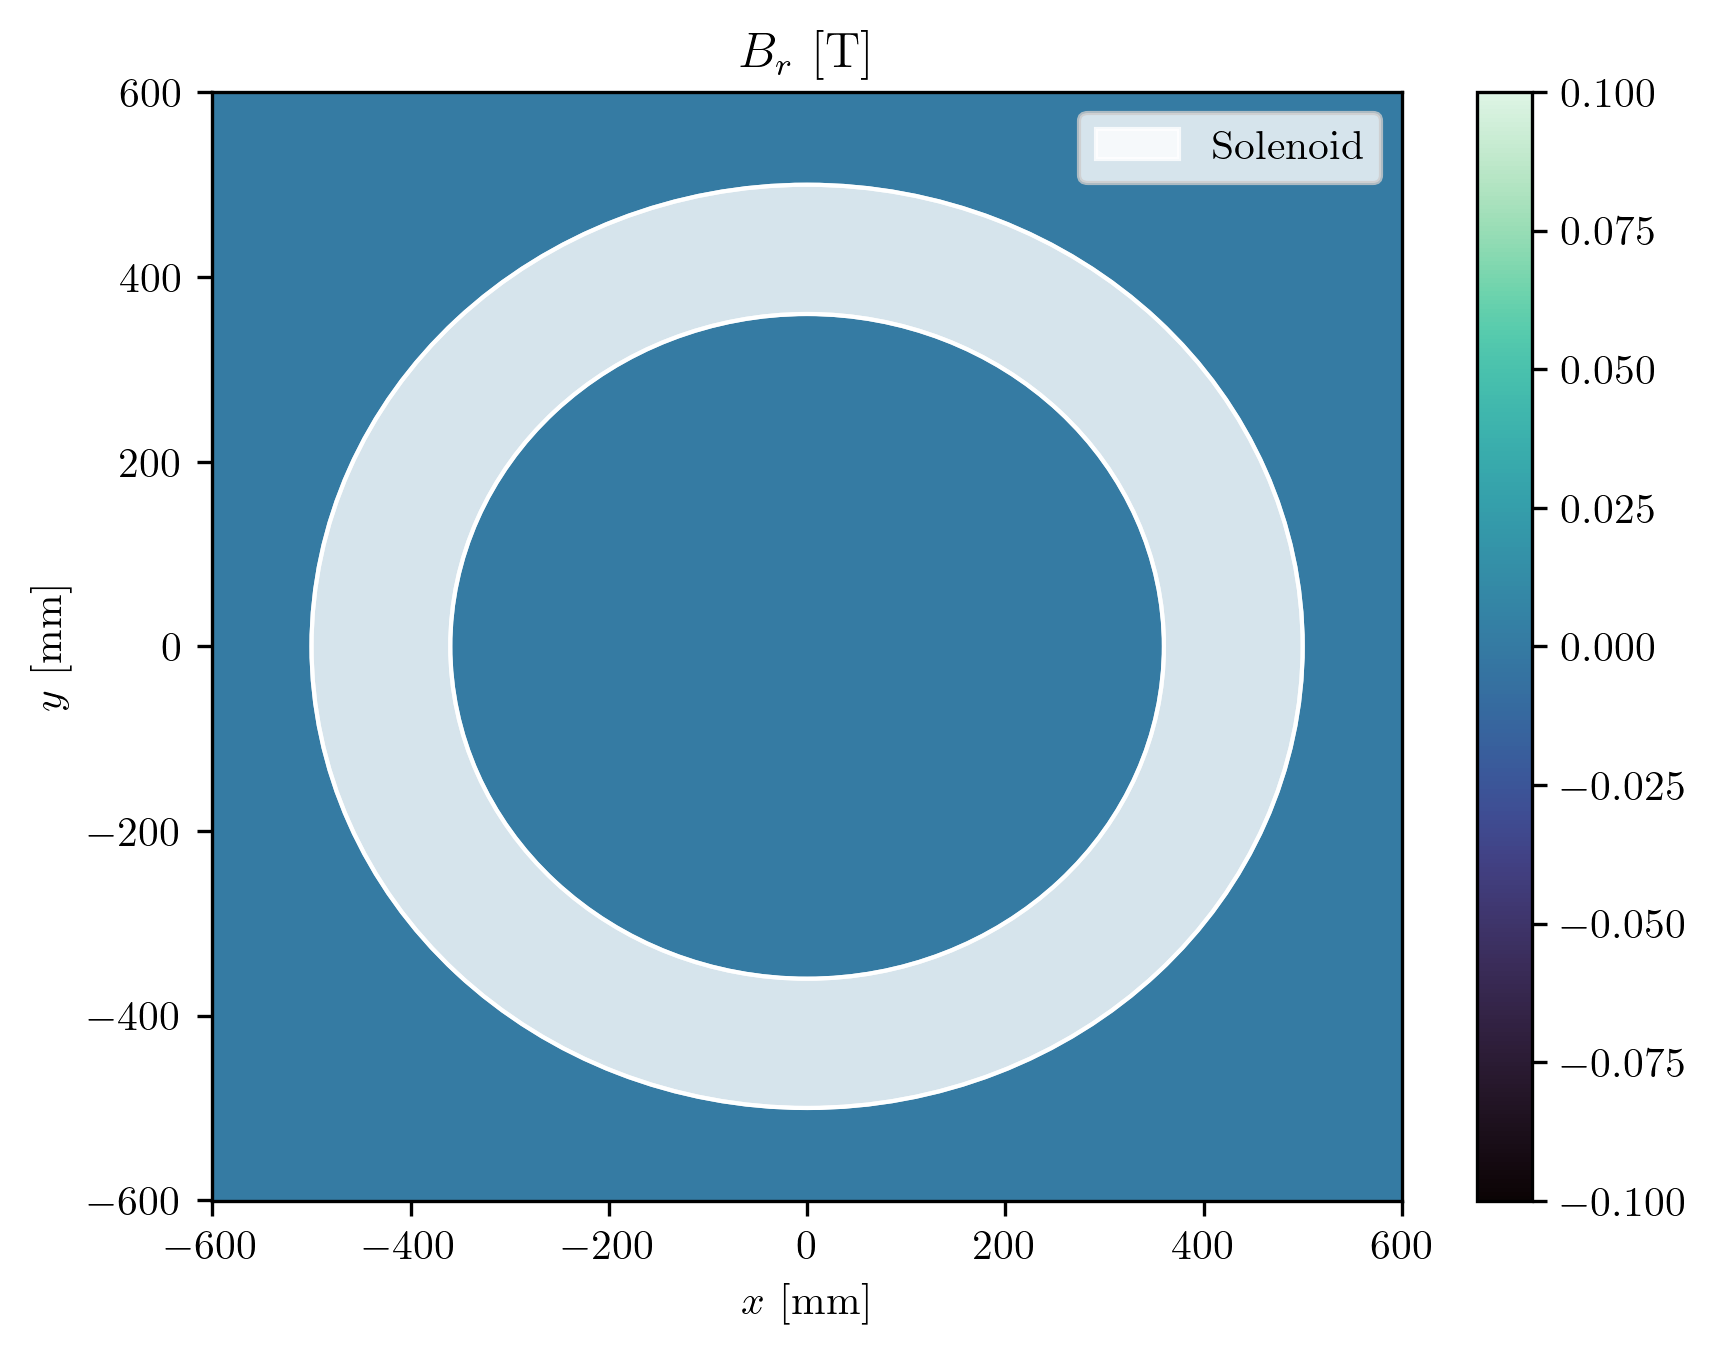

In [5]:
data_filtered = data[data['z'] == 0.0]

x_unique = np.sort(data_filtered['x'].unique())
y_unique = np.sort(data_filtered['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

Br_pivot = data_filtered.pivot_table(index='y', columns='x', values='Br', aggfunc='mean')
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto')

circle_inner = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='white')
ax.add_patch(circle_inner)

circle_outer = plt.Circle([0,0], radius=b, fill=False, linestyle='-', color='white')
ax.add_patch(circle_outer)

fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8)
ax.add_patch(fill)
plt.legend()

plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.colorbar(pcm)
plt.show()

### Animated field map for transverse slice along z

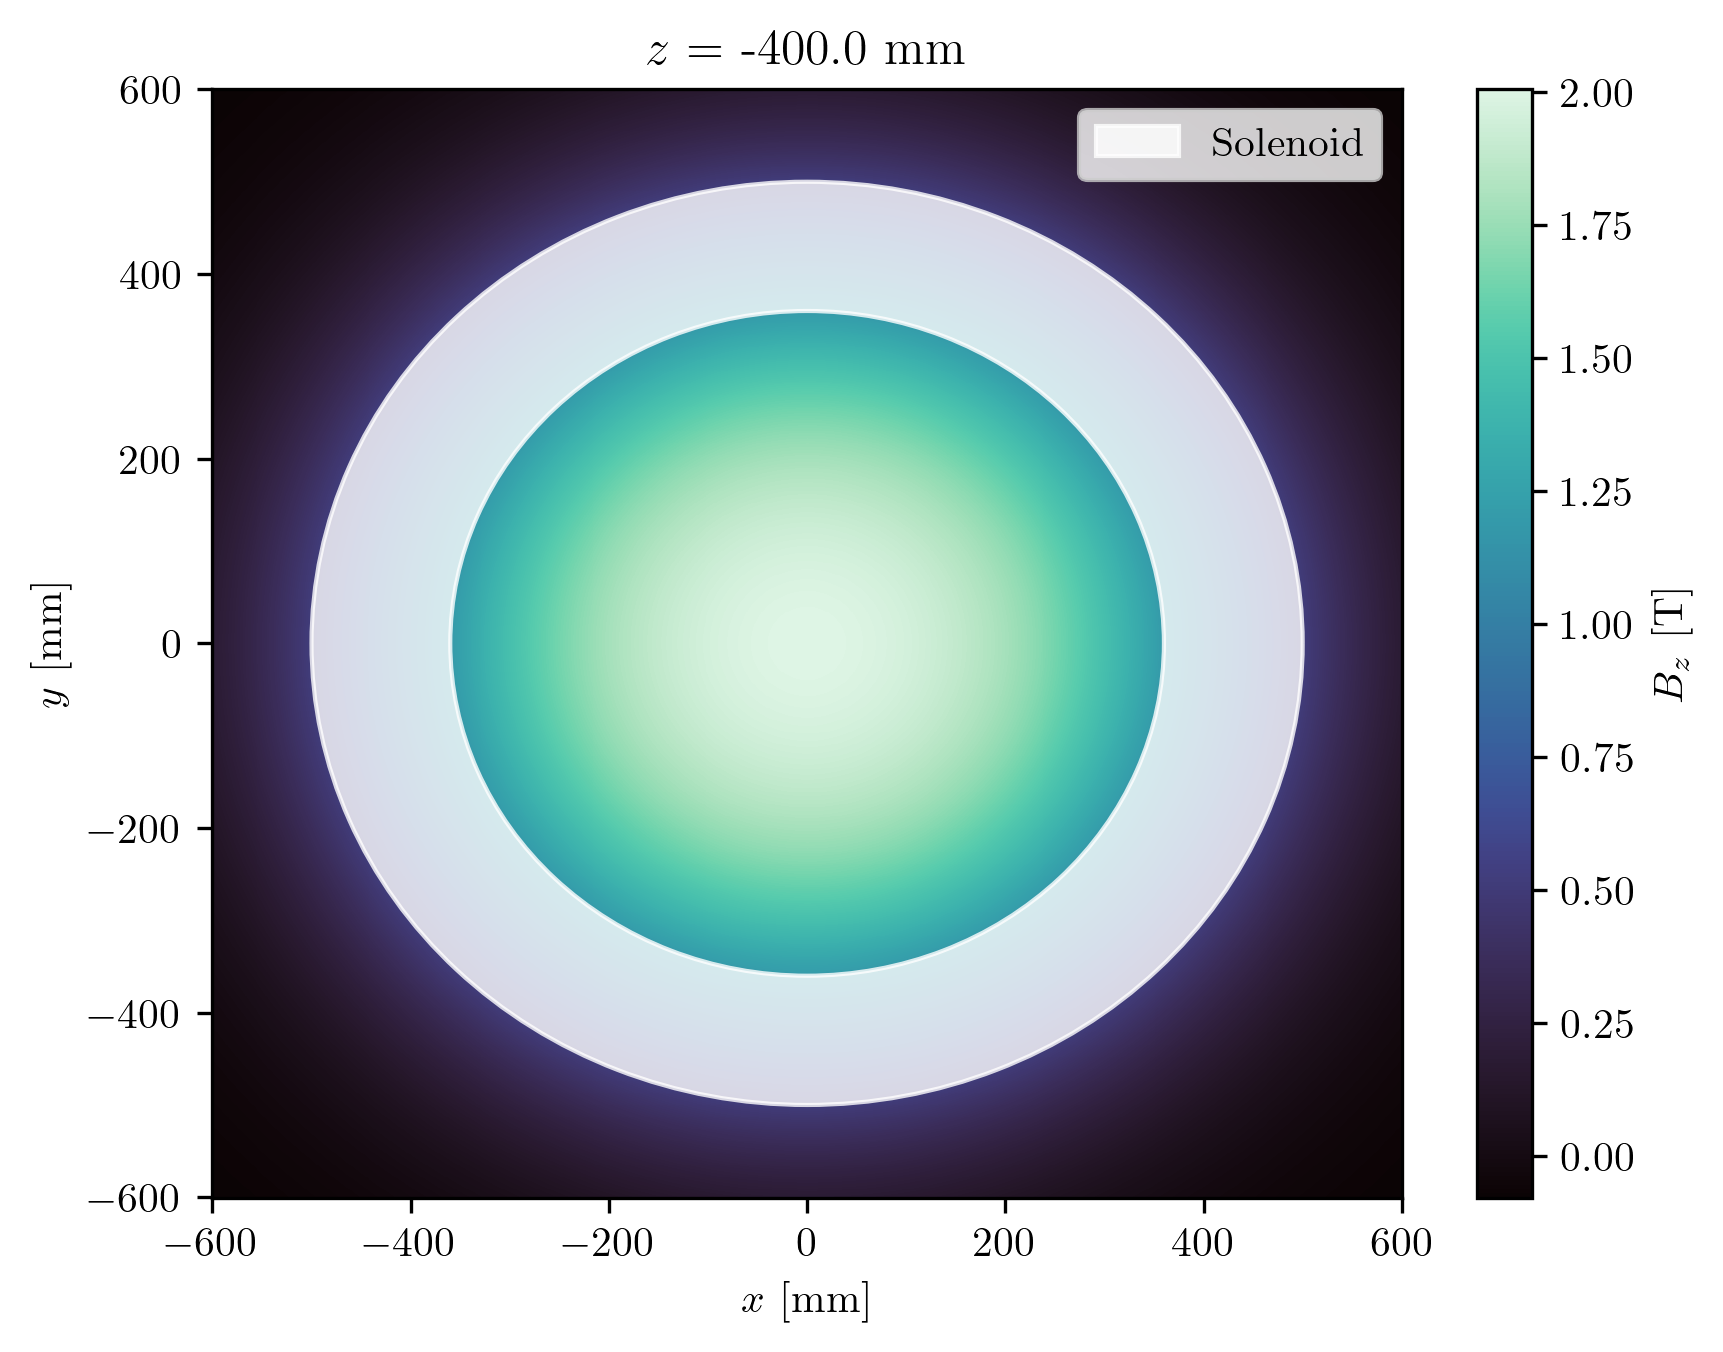

In [6]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)
Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean').values

fig, ax = plt.subplots()

circle_inner = Circle((0, 0), radius=a, fill=False, linestyle='-', color='white')
circle_outer = Circle((0, 0), radius=b, fill=False, linestyle='-', color='white')
fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8, zorder=10)
ax.add_patch(circle_inner)
ax.add_patch(circle_outer)
ax.add_patch(fill)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.legend(loc='upper right')

cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto')
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_filtered = data[data['z'] == unique_z[frame]]
    Bz_grid = data_filtered.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=300, blit=False, repeat=True)
animation.save('Bz_g4bl.gif', writer='pillow')

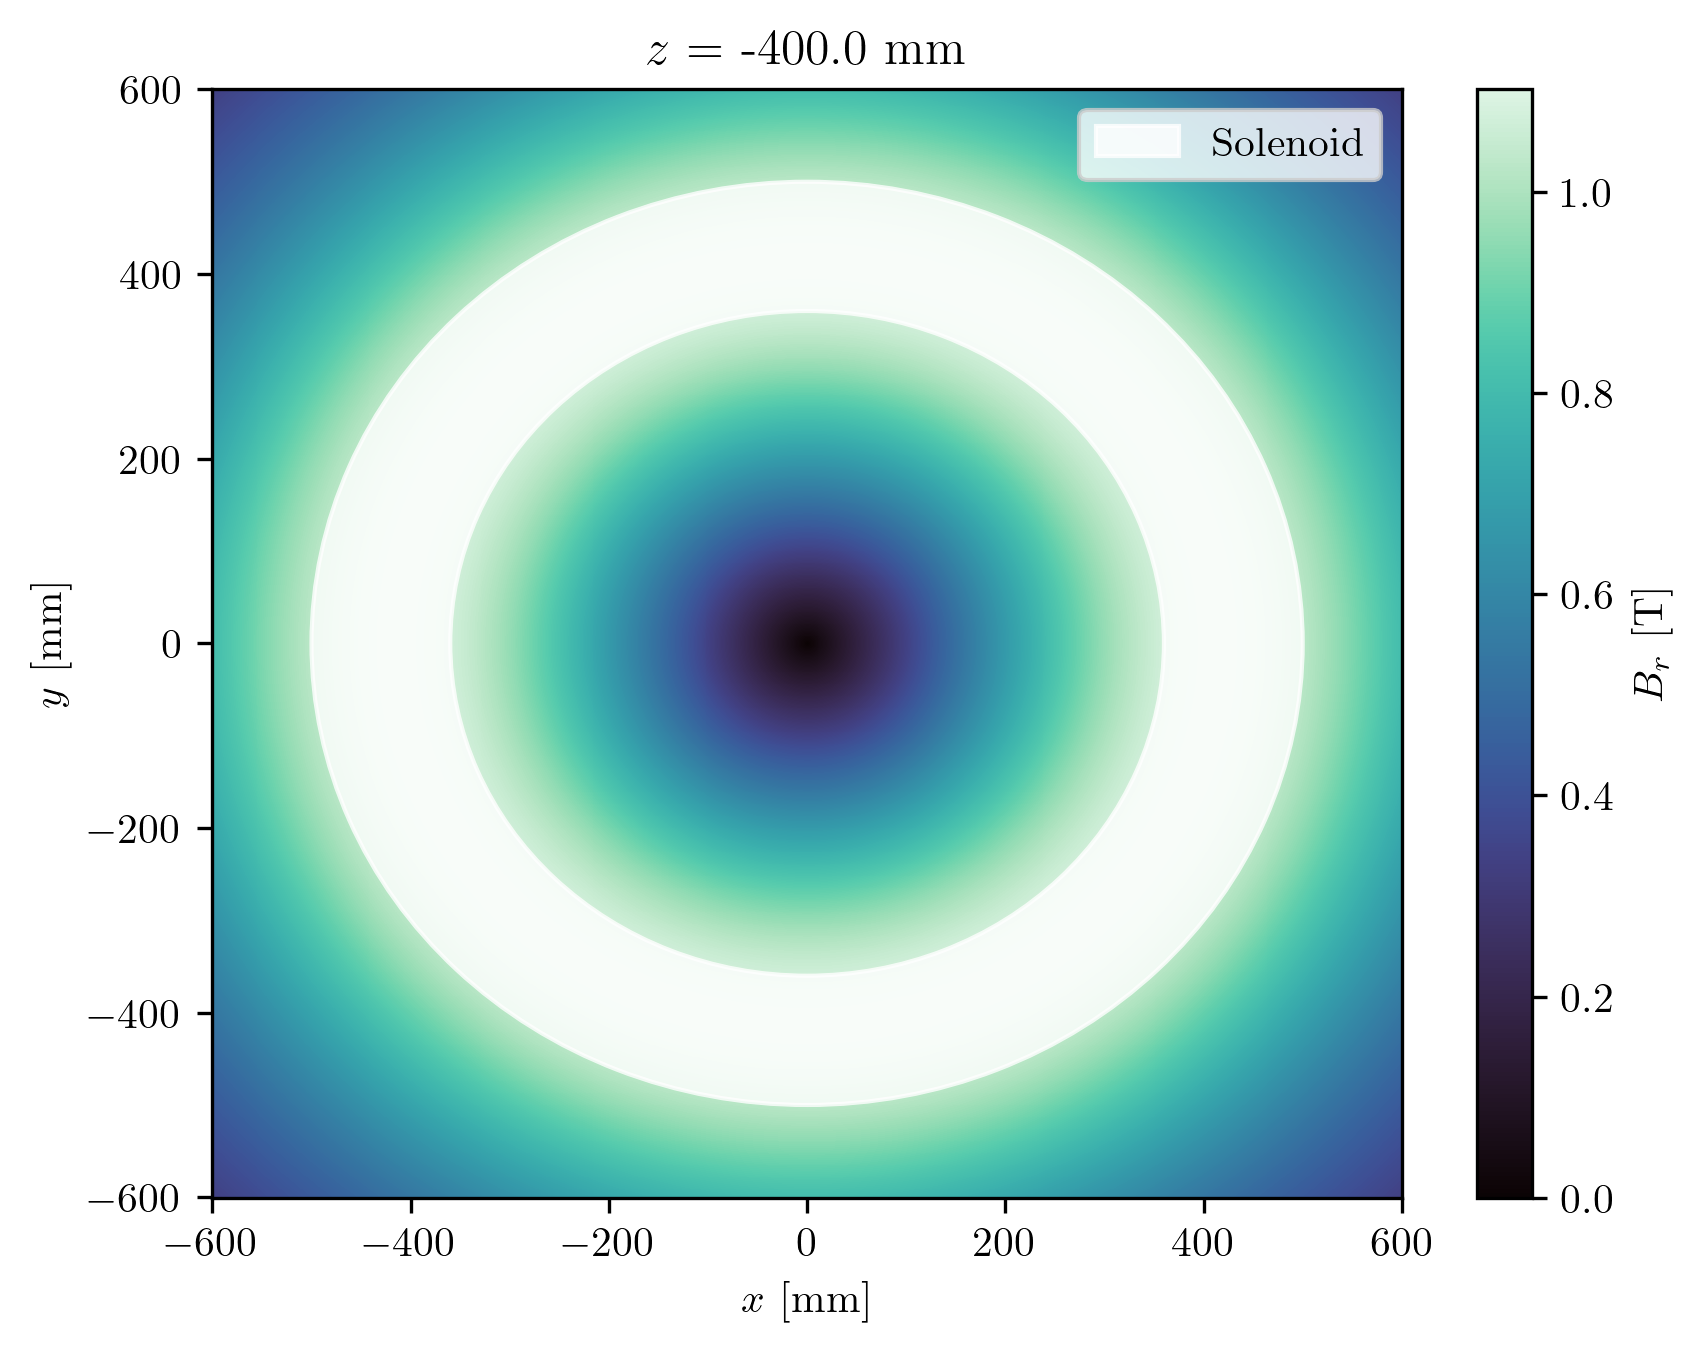

In [7]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)
Br_init = init_data.pivot_table(index='y', columns='x', values='Br', aggfunc='mean').values

fig, ax = plt.subplots()

circle_inner = Circle((0, 0), radius=a, fill=False, linestyle='-', color='white')
circle_outer = Circle((0, 0), radius=b, fill=False, linestyle='-', color='white')
fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8, zorder=10)
ax.add_patch(circle_inner)
ax.add_patch(circle_outer)
ax.add_patch(fill)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
ax.legend(loc='upper right')

cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto')
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_filtered = data[data['z'] == unique_z[frame]]
    Br_grid = data_filtered.pivot_table(index='y', columns='x', values='Br', aggfunc='mean').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=300, blit=False, repeat=True)
animation.save('Br_g4bl.gif', writer='pillow')

## Single solenoid -- with pitch

### Plot transverse slice at z=0

In [8]:
file = 'fieldmap_pitch.txt'

data = readFieldMapData(file)

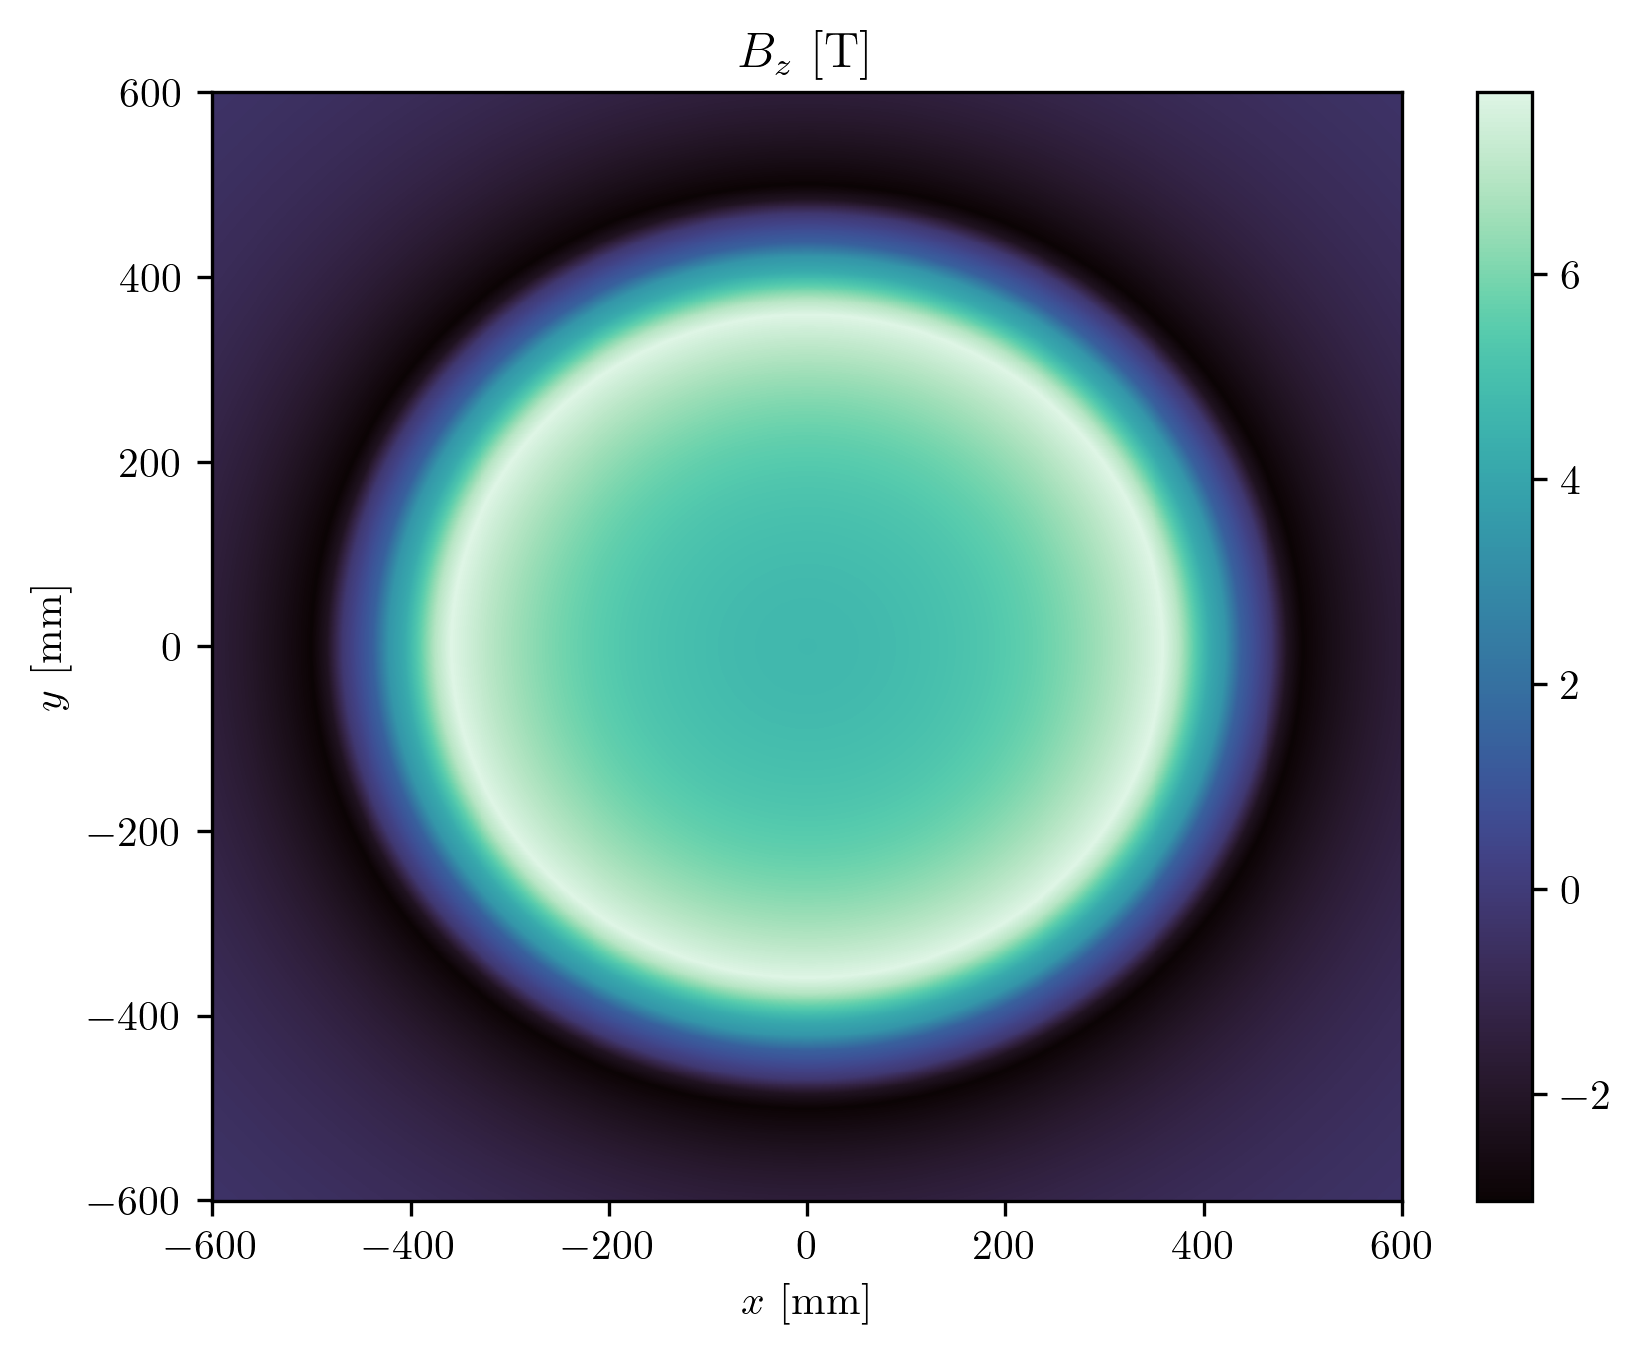

In [9]:
data_filtered = data[data['z'] == 0.0]

x_unique = np.sort(data_filtered['x'].unique())
y_unique = np.sort(data_filtered['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

B_pivot = data_filtered.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean')
B_grid = B_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, B_grid, cmap=cmap, shading='auto')

plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.colorbar(pcm)
plt.show()

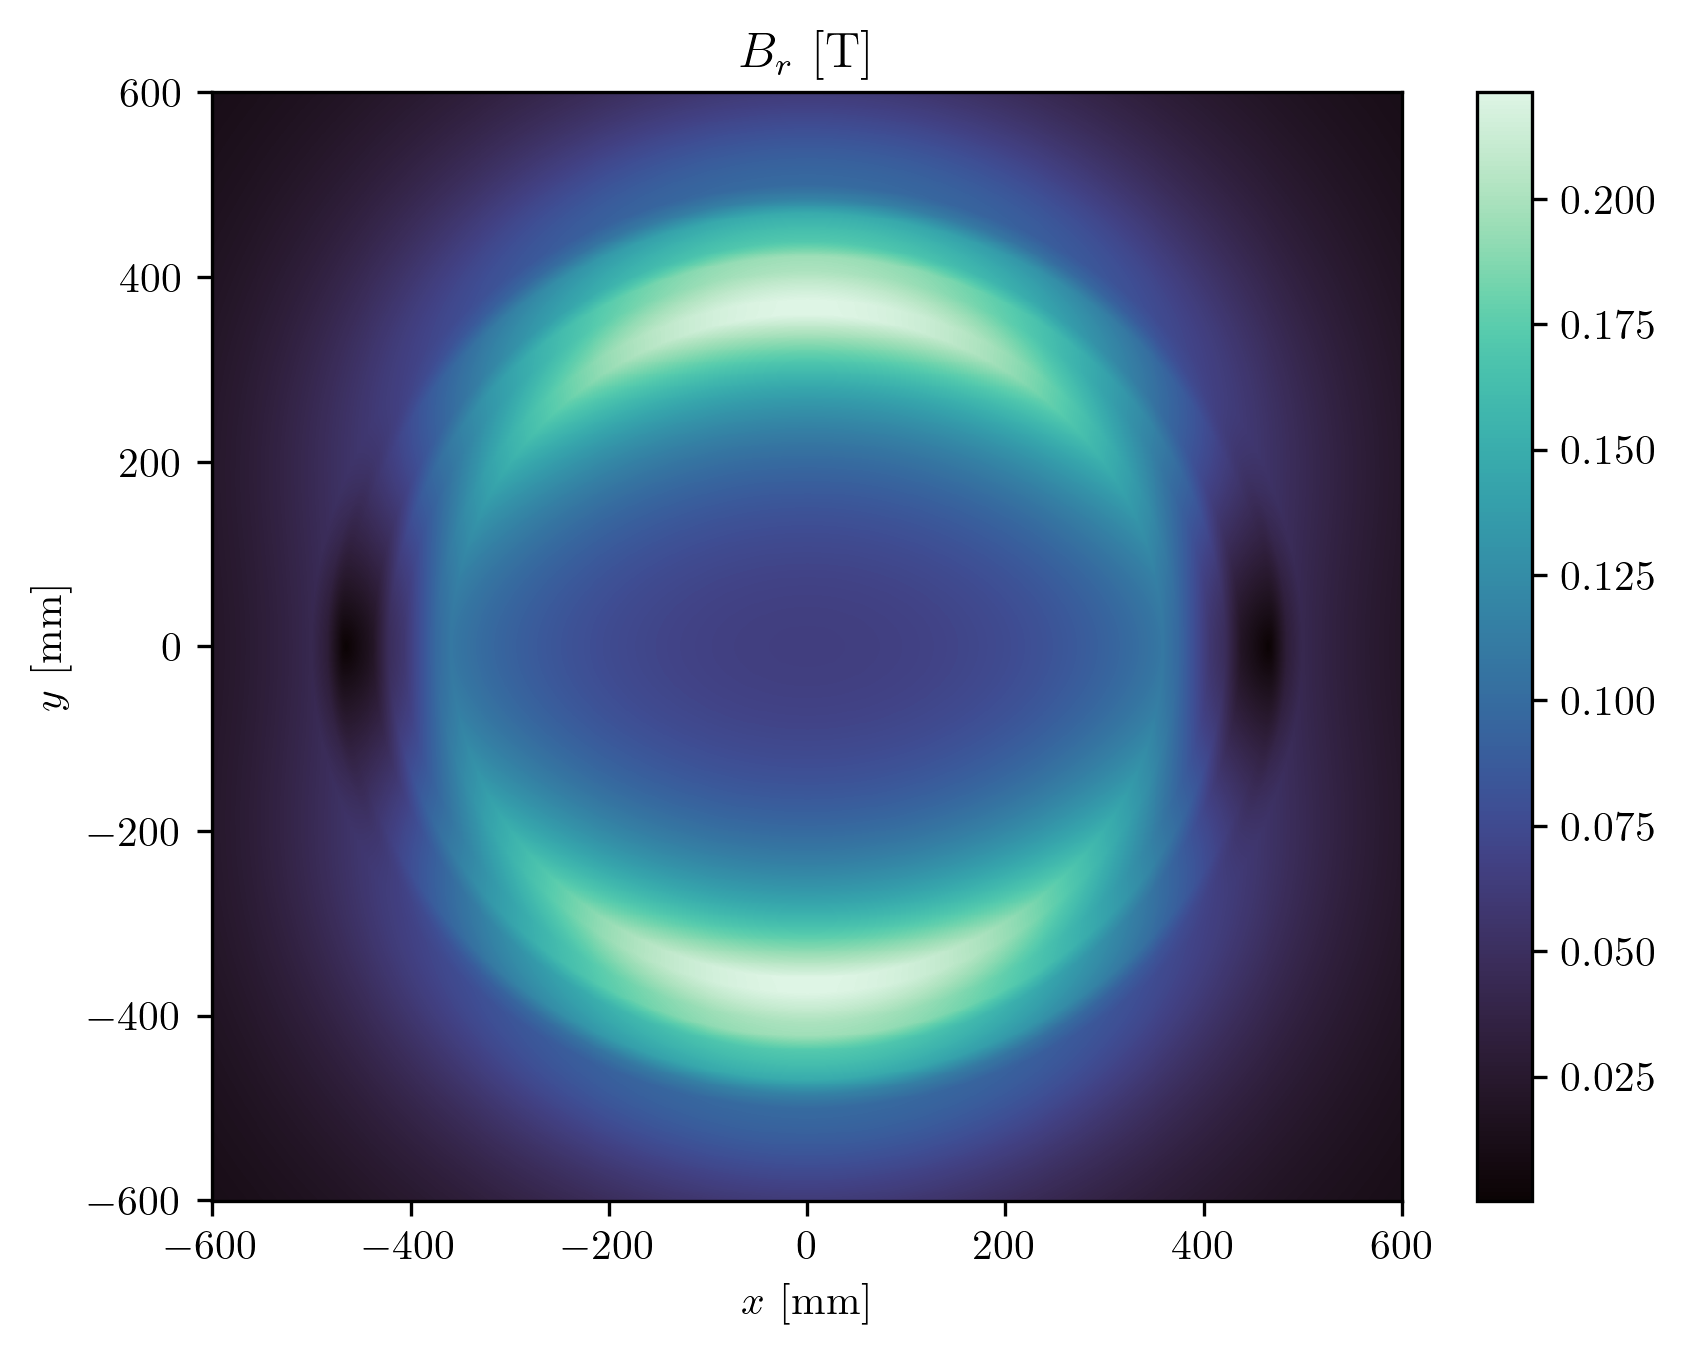

In [10]:
data_filtered = data[data['z'] == 0.0]

x_unique = np.sort(data_filtered['x'].unique())
y_unique = np.sort(data_filtered['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

Br_pivot = data_filtered.pivot_table(index='y', columns='x', values='Br', aggfunc='mean')
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto')

plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.colorbar(pcm)
plt.show()

### Animated field map for transverse slice along z

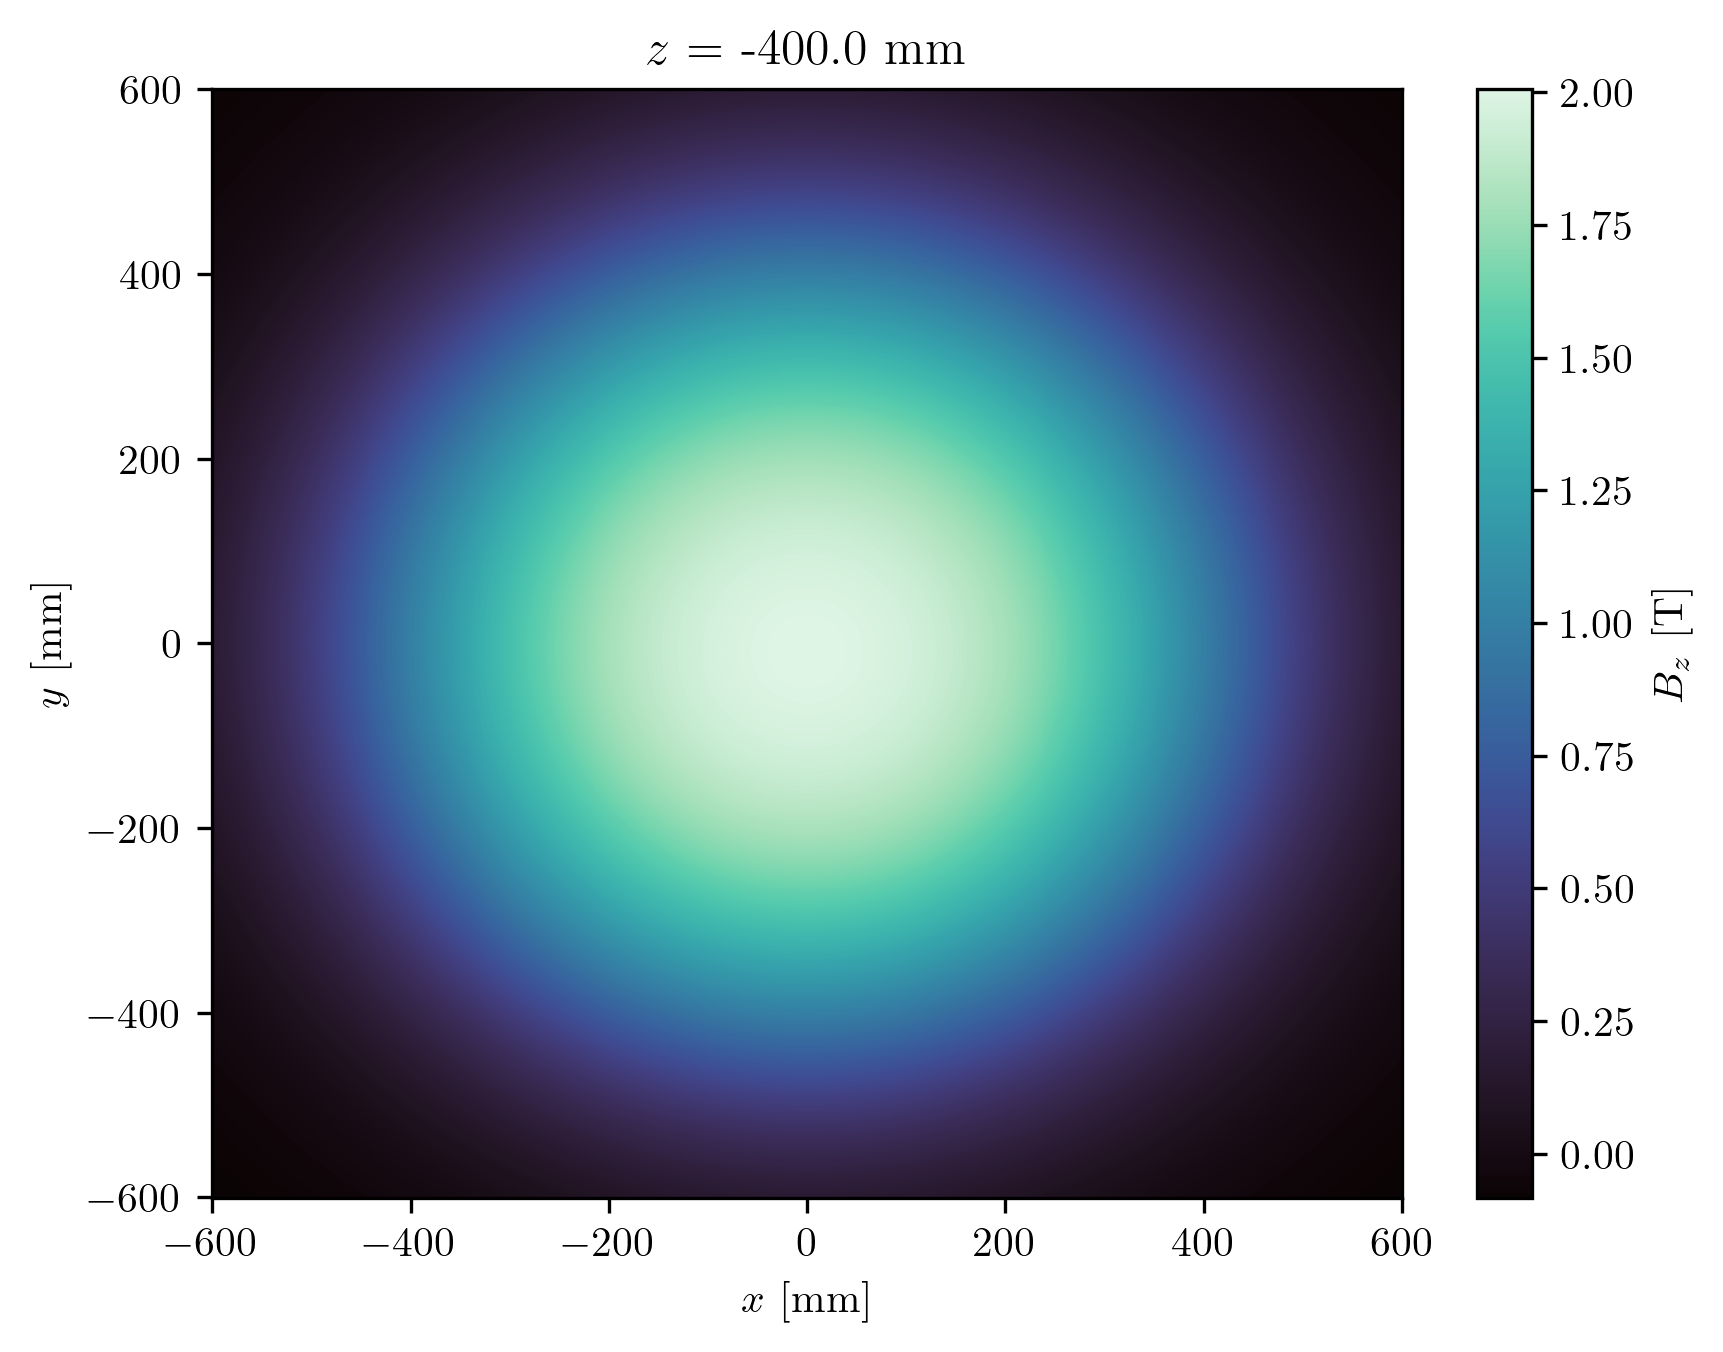

In [13]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)
Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean').values

fig, ax = plt.subplots()

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')

cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto')
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_filtered = data[data['z'] == unique_z[frame]]
    Bz_grid = data_filtered.pivot_table(index='y', columns='x', values='Bz', aggfunc='mean').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=500, blit=False, repeat=False)
animation.save('Bz_g4bl_pitch.gif', writer='pillow')

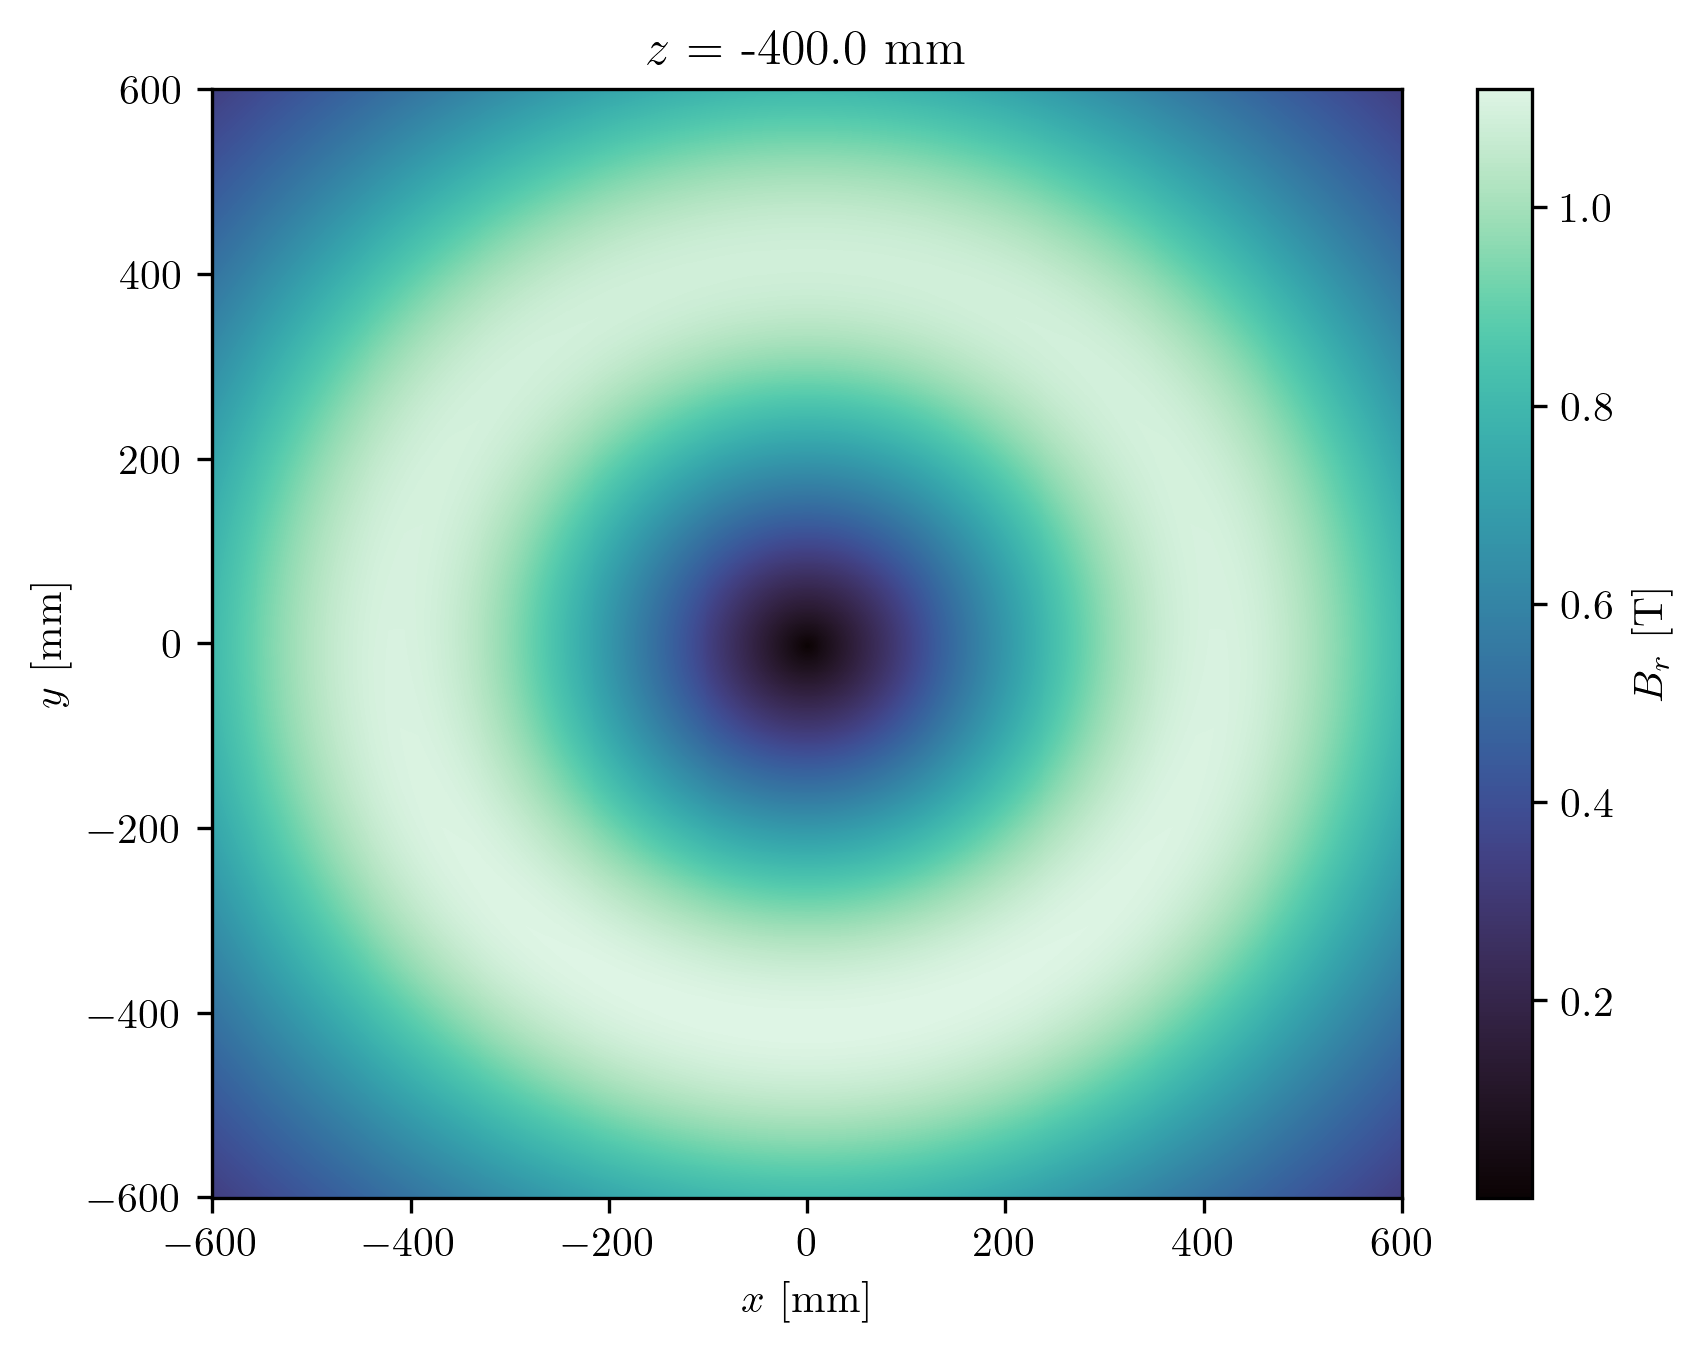

In [14]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)
Br_init = init_data.pivot_table(index='y', columns='x', values='Br', aggfunc='mean').values

fig, ax = plt.subplots()

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')

cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto')
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_filtered = data[data['z'] == unique_z[frame]]
    Br_grid = data_filtered.pivot_table(index='y', columns='x', values='Br', aggfunc='mean').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=500, blit=False, repeat=False)
animation.save('Br_g4bl_pitch.gif', writer='pillow')